# This is YOLOV5 custom object detection training and testing on Custom Dataset with Tensorflow and Pytorch
Following preparation steps are :

1. Installation of multiple packages
2. Splitting Dataset into train, test, and val
3. Preprocessing custom dataset
4. Establishing Bounding box coordinates based on Garbage Dataset and parsing to yaml file

Train, Test Val for Custom Model

5. Model is trained with 50 epoch and Saved as best.pt
6. Model is tested and validated with achieviemenet of 93 % accuracy(This can be increased with playing hyperparameters)

7.Model is then converted to ONNX and Onnx model is tested on unseen Images
    7.1. Model is saved as best.onnx
    7.2 Yaml Data has to ben added to provided custom classed to ONNX Model
    
8.ONNX Model is converted finally to TensorRT
    8.1 Tensorrt version is 8.6
    8.2 Install tensorrt with debian packages
    8.3.Install Opencv with Pip env
    8.4 Usage of TrtExec
        trtexec --help
    8.5 Install pycuda with Debian
    
9. TensorRT achieved great performance on test dataset with minibatces of 30 images



In [1]:
!nvidia-smi

Mon May 22 13:13:41 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.41.03              Driver Version: 530.41.03    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 L...    Off| 00000000:01:00.0  On |                  N/A |
| N/A   39C    P8               14W /  N/A|     69MiB /  6144MiB |     32%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import glob
import shutil
import cv2
import os
import re
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
import PIL

In [3]:
training_data = '/tensorfl_vision/Tensorflow_Yolov5/yolo/train/images'
testing_data = '/tensorfl_vision/Tensorflow_Yolov5/yolo/val/images'

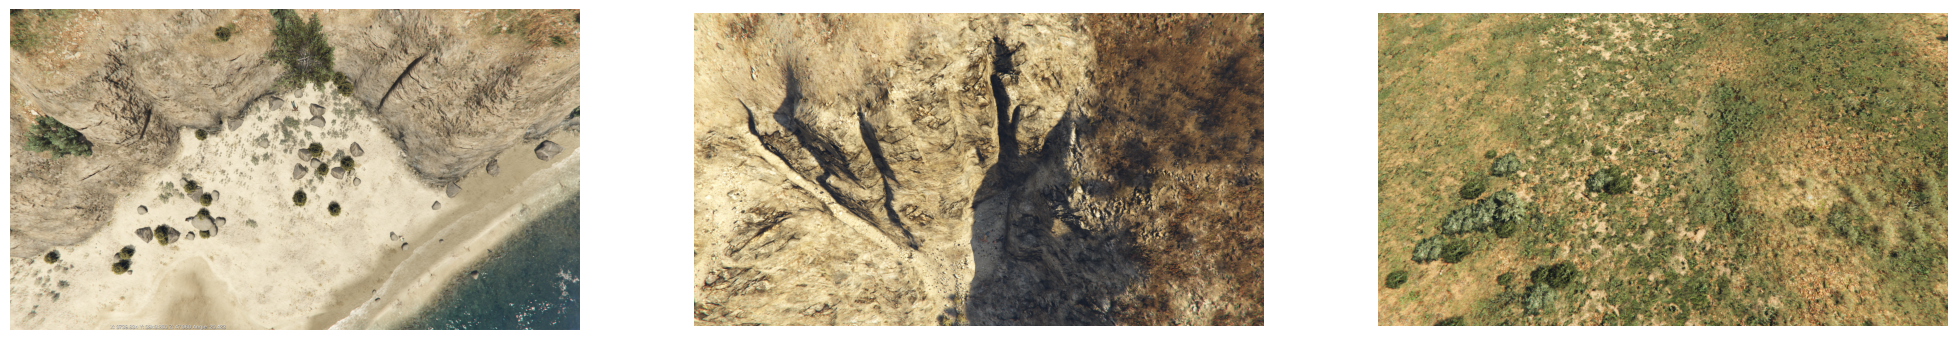

In [4]:
from PIL import Image
import os
import random


detection_images = [os.path.join(training_data, x) for x in os.listdir(training_data)]

limited_range = 3

selected_images = random.sample(detection_images, limited_range)

fig, axes = plt.subplots (nrows =1, ncols=limited_range, figsize=(25,25))

for i, image in enumerate(selected_images):
    
    detection_image = Image.open(image)
    axes[i].imshow(detection_image)
    axes[i].axis('off')

plt.show()

In [12]:
yaml_file = """names:
  - target
  - target
nc: 2
train: /tensorfl_vision/Tensorflow_Yolov5/yolo/train/images
val: /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images

"""

with open('/tensorfl_vision/Tensorflow_Yolov5/yolo/update_vggFuoco.yaml', 'w') as f:
    f.write(yaml_file)

In [5]:
import yaml
data_yaml_2 = '/tensorfl_vision/Tensorflow_Yolov5/yolo/update_vggFuoco.yaml'
with open(data_yaml_2, 'r') as f:
    data = yaml.safe_load(f)
    
print(data)

{'names': ['target', 'target'], 'nc': 2, 'train': '/tensorfl_vision/Tensorflow_Yolov5/yolo/train/images', 'val': '/tensorfl_vision/Tensorflow_Yolov5/yolo/val/images'}


In [15]:
!pwd 

/tensorfl_vision/Tensorflow_Yolov5


In [16]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15697, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 15697 (delta 6), reused 17 (delta 4), pack-reused 15672
Receiving objects: 100% (15697/15697), 14.42 MiB | 9.58 MiB/s, done.
Resolving deltas: 100% (10752/10752), done.


In [18]:
cd  /tensorfl_vision/Tensorflow_Yolov5/yolov5/

/tensorfl_vision/Tensorflow_Yolov5/yolov5


In [19]:
!pip install -r requirements.txt

# Training is done with following hyperparameters on --weights yolov5l6.pt
    1. --img 640 (It has to be 1280)
    2. --batch 4(it has to be around 64-128)
    3. --epoch 50 (it has to be around 300)

In [7]:
epochs=150
sign_data=data_yaml_2
!python /tensorfl_vision/Tensorflow_Yolov5/yolov5/train.py --img 640 --batch 4 --epochs {epochs} --data {sign_data} --weights yolov5l6.pt

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5l6.pt, cfg=, data=/tensorfl_vision/Tensorflow_Yolov5/yolo/update_vggFuoco.yaml, hyp=../yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifac

      25/49      3.82G    0.09126    0.02417  0.0006474          9        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        164        568      0.825      0.286      0.269     0.0985

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      26/49      3.82G    0.08966    0.02324  0.0006494          3        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        164        568      0.806      0.281      0.243      0.089

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      27/49      3.82G    0.08837    0.02355  0.0005818          6        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        164        568      0.791      0.274      0.243     0.0889

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      28/4

Optimizer stripped from ../yolov5/runs/train/exp18/weights/last.pt, 153.0MB
Optimizer stripped from ../yolov5/runs/train/exp18/weights/best.pt, 153.0MB

Validating ../yolov5/runs/train/exp18/weights/best.pt...
Fusing layers... 
Model summary: 346 layers, 76126356 parameters, 0 gradients, 109.9 GFLOPs
                 Class     Images  Instances          P          R      mAP50   
                   all        164        568      0.839       0.28      0.292      0.113
                target        164        234          1          0     0.0638     0.0198
                target        164        334      0.678      0.561       0.52      0.206
Results saved to ../yolov5/runs/train/exp18


In [ ]:
!pip install -r requirements.txt

# Riconoscimento dei immagini con checkpoint salvato

    1. Modello Allenato: best.pt
    2. Confidence score: 0.3
    3. Immagini vengono salvato nel directory: yolov5_vgg
    4. Detection Time: 15.ms
    5. Frame Per Second:64.51

In [8]:
!python /tensorfl_vision/Tensorflow_Yolov5/yolov5/detect.py --source '/tensorfl_vision/Tensorflow_Yolov5/yolo/val/images' --weights '/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/best.pt' --conf 0.3 --name yolov5_vgg           

detect: weights=['/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/best.pt'], source=/tensorfl_vision/Tensorflow_Yolov5/yolo/val/images, data=../yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../yolov5/runs/detect, name=yolov5_vgg, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-169-geef637c Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5938MiB)

Fusing layers... 
Model summary: 346 layers, 76126356 parameters, 0 gradients, 109.9 GFLOPs
image 1/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/0013_40.png: 384x640 3 targets, 49.6ms
image 2/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/0020_40.png: 384x640 1 target, 15.8ms
image 3/164 /ten

image 74/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/584_40.png: 384x640 3 targets, 15.8ms
image 75/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de401-5f56-11ed-b6d1-ffbd8b837018_40.png: 384x640 4 targets, 16.6ms
image 76/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de408-5f56-11ed-b6d1-ffbd8b837018_40.png: 384x640 4 targets, 15.9ms
image 77/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de40a-5f56-11ed-b6d1-ffbd8b837018_40.png: 384x640 2 targets, 15.5ms
image 78/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de415-5f56-11ed-b6d1-ffbd8b837018_40.png: 384x640 3 targets, 16.0ms
image 79/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de41b-5f56-11ed-b6d1-ffbd8b837018_40.png: 384x640 2 targets, 15.5ms
image 80/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de422-5f56-11ed-b6d1-ffbd8b837018_40.png: 384x640 3 targets, 15.5ms
image 81/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de429-5f56-11ed-b6d1-

image 144/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_GRO_0011.JPG: 512x640 4 targets, 19.9ms
image 145/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0001.JPG: 384x640 2 targets, 15.5ms
image 146/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0003.JPG: 512x640 2 targets, 19.9ms
image 147/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0004.JPG: 384x640 (no detections), 16.0ms
image 148/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0005.JPG: 512x640 1 target, 20.0ms
image 149/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0006.JPG: 384x640 2 targets, 15.5ms
image 150/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MOB_0005.JPG: 512x640 4 targets, 19.9ms
image 151/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_SB_0001.JPG: 512x640 1 target, 19.8ms
image 152/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_SB_0002.JPG: 512x640 2 targets, 20.8ms
image 15

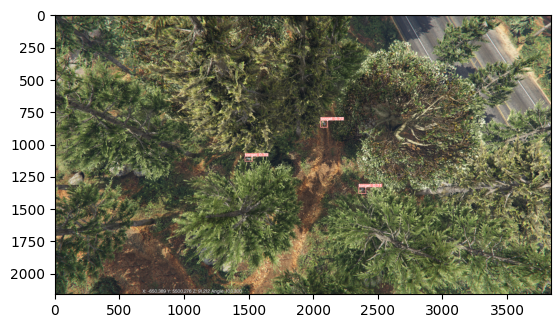

In [1]:
import os 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

results = '/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/detect/yolov5_vgg'

detection_images = [os.path.join(results, img) for img in os.listdir(results)]

random_detection = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection ))

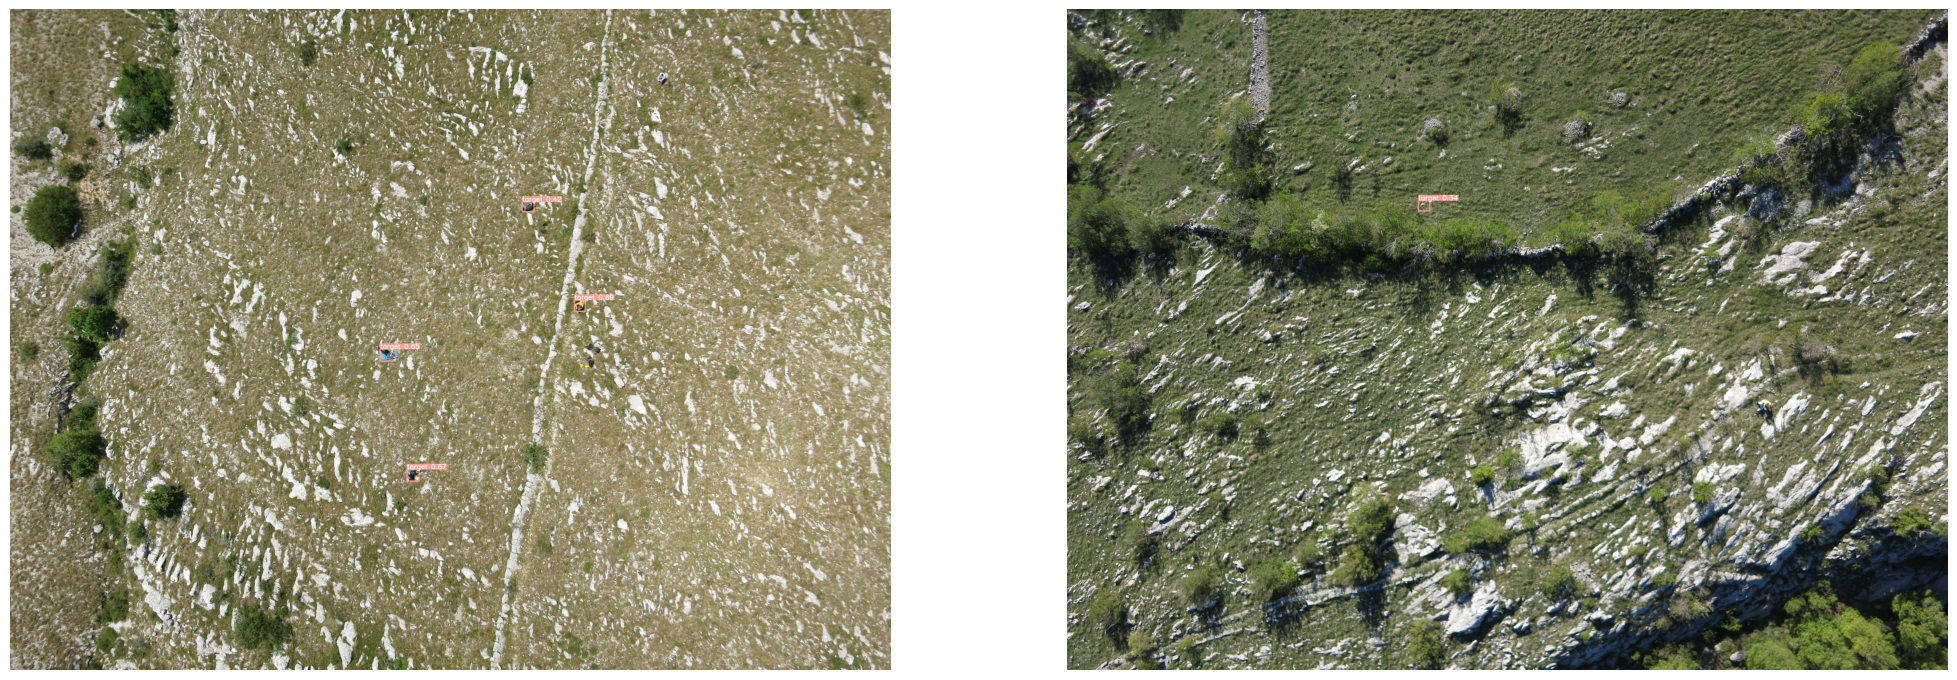

In [9]:
from PIL import Image
import os
import random


detection_images = [os.path.join(results, x) for x in os.listdir(results)]

limited_range = 2

selected_images = random.sample(detection_images, limited_range)

fig, axes = plt.subplots (nrows =1, ncols=limited_range, figsize=(25,25))

for i, image in enumerate(selected_images):
    
    detection_image = Image.open(image)
    axes[i].imshow(detection_image)
    axes[i].axis('off')

plt.show()

In [7]:
metrics = '/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18'

In [22]:
os.listdir(metrics)

['events.out.tfevents.1684762797.205e663c4291.106.0',
 'train_batch1.jpg',
 'results.png',
 'labels.jpg',
 'weights',
 'train_batch0.jpg',
 'P_curve.png',
 'confusion_matrix.png',
 'val_batch2_pred.jpg',
 'val_batch1_pred.jpg',
 'val_batch1_labels.jpg',
 'F1_curve.png',
 'R_curve.png',
 'val_batch0_labels.jpg',
 'results.csv',
 'hyp.yaml',
 'train_batch2.jpg',
 'PR_curve.png',
 'val_batch0_pred.jpg',
 'val_batch2_labels.jpg',
 'opt.yaml',
 'labels_correlogram.jpg']

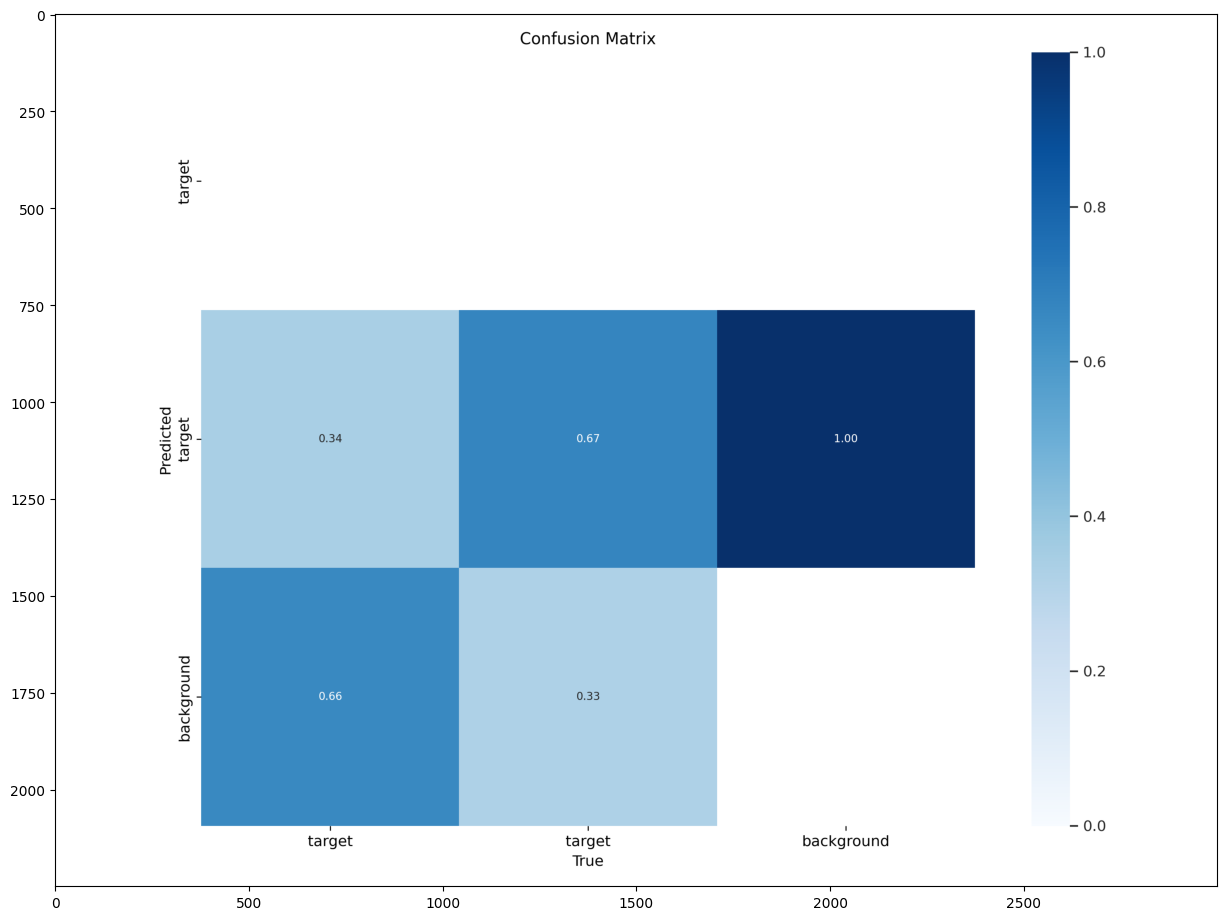

In [24]:
img_path = metrics + '/confusion_matrix.png'
img_confusion = Image.open(img_path)
plt.figure(figsize=(15,15))
plt.imshow(img_confusion)

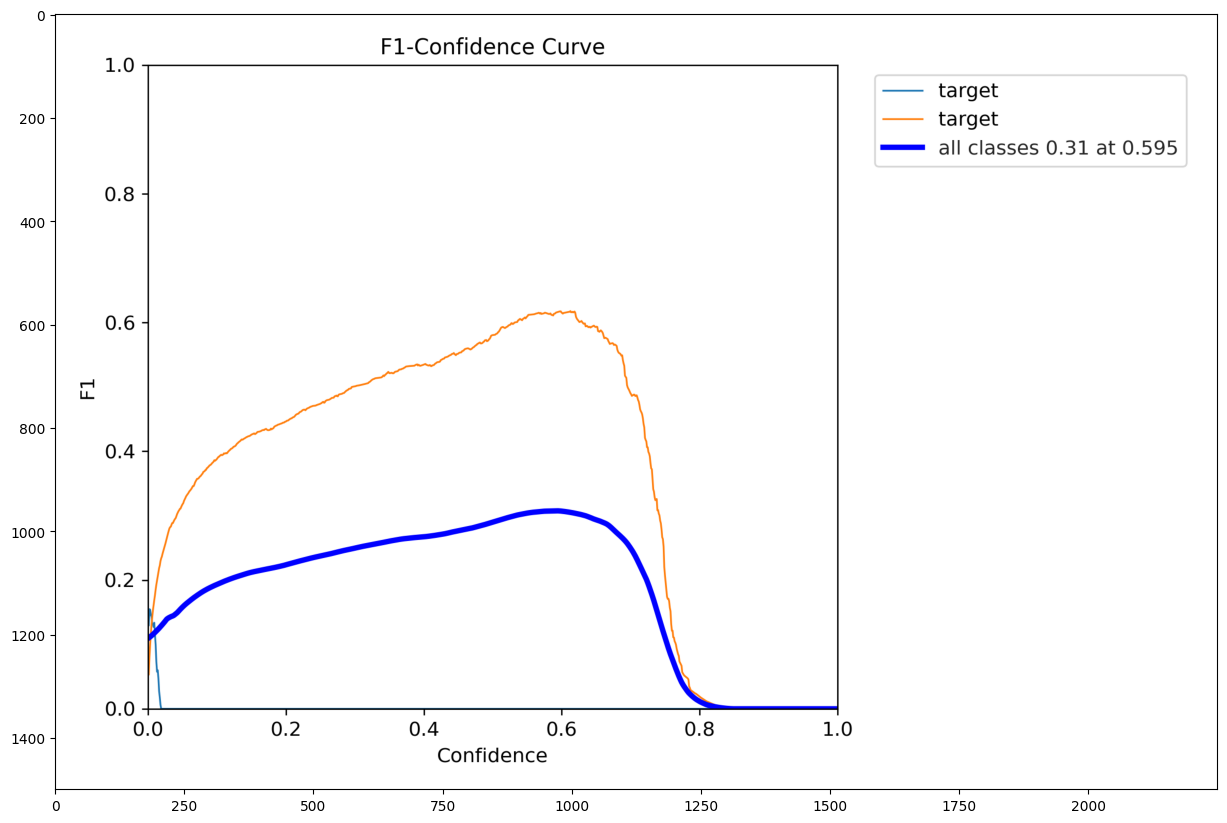

In [25]:
img_path = metrics + '/F1_curve.png'
img_confusion = Image.open(img_path)
plt.figure(figsize=(15,15))
plt.imshow(img_confusion)

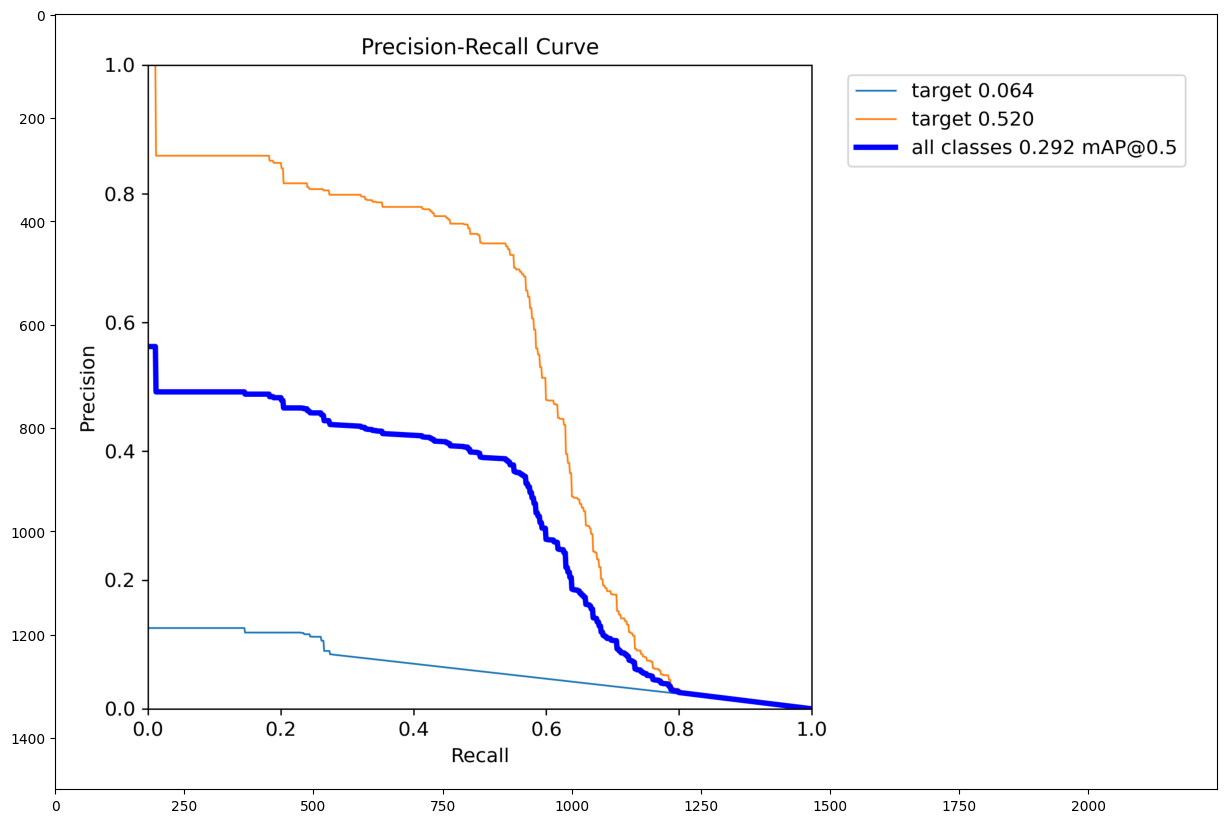

In [26]:
img_path = metrics + '/PR_curve.png'
img_confusion = Image.open(img_path)
plt.figure(figsize=(15,15))
plt.imshow(img_confusion)

In [ ]:
img_path = metrics + '/val_batch0_pred.jpg'
img_confusion = Image.open(img_path)
plt.figure(figsize=(15,15))
plt.imshow(img_confusion)

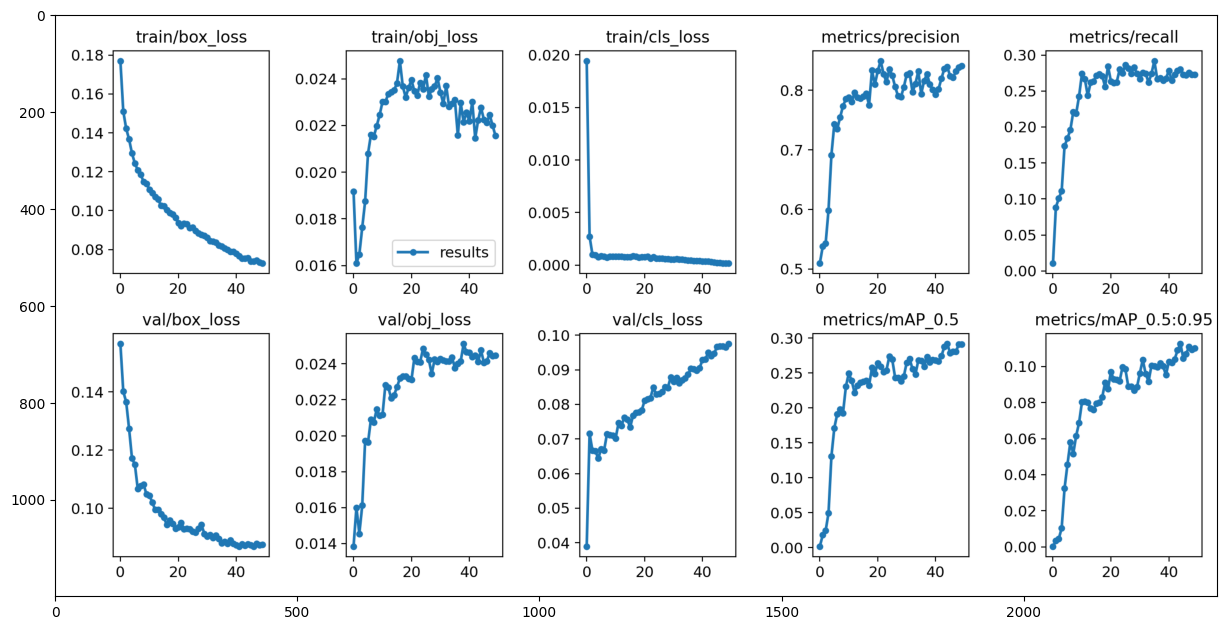

In [8]:
img_path = metrics + '/results.png'
img_confusion = Image.open(img_path)
plt.figure(figsize=(15,15))
plt.imshow(img_confusion)

    # Convert to PT to Onnx
        1.  name of pt and path of pt: best.pt
        2. workspace : 2048
        3. classes: data_yaml_2
        4. model extension : --include onnx

In [8]:
!python /tensorfl_vision/Tensorflow_Yolov5/yolov5/export.py --weights /tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/best.pt --workspace 2048 --data {data_yaml_2} --include onnx

export: data=/tensorfl_vision/Tensorflow_Yolov5/yolo/update_vggFuoco.yaml, weights=['/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=2048, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-169-geef637c Python-3.8.10 torch-2.0.1+cu117 CPU

Fusing layers... 
Model summary: 346 layers, 76126356 parameters, 0 gradients, 109.9 GFLOPs

PyTorch: starting from /tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/best.pt with output shape (1, 25500, 7) (145.9 MB)

ONNX: starting export with onnx 1.14.0...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR =====================

# Detect with onnx on test images

    1. Confidence threshold :0.3
    2. Name of saved files: yolov5_vgg_onnx
    3. Parse dataa yaml
    4. Parse Test Images
    
    5. Detection TIme: 27.7ms
    6. Frame Per Second: 36

In [9]:
!python /tensorfl_vision/Tensorflow_Yolov5/yolov5/detect.py --source '/tensorfl_vision/Tensorflow_Yolov5/yolo/val/images' --weights '/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/best.onnx' --conf 0.3 --data {data_yaml_2} --name yolov5_vgg_onnx           

detect: weights=['/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/best.onnx'], source=/tensorfl_vision/Tensorflow_Yolov5/yolo/val/images, data=/tensorfl_vision/Tensorflow_Yolov5/yolo/update_vggFuoco.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=yolov5_vgg_onnx, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-169-geef637c Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5938MiB)

Loading /tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/best.onnx for ONNX Runtime inference...
image 1/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/0013_40.png: 640x640 3 targets, 23.8ms
image 2/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/i

image 73/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/577_40.png: 640x640 1 target, 27.6ms
image 74/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/584_40.png: 640x640 3 targets, 27.5ms
image 75/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de401-5f56-11ed-b6d1-ffbd8b837018_40.png: 640x640 4 targets, 27.7ms
image 76/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de408-5f56-11ed-b6d1-ffbd8b837018_40.png: 640x640 4 targets, 27.7ms
image 77/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de40a-5f56-11ed-b6d1-ffbd8b837018_40.png: 640x640 2 targets, 27.8ms
image 78/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de415-5f56-11ed-b6d1-ffbd8b837018_40.png: 640x640 3 targets, 27.6ms
image 79/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de41b-5f56-11ed-b6d1-ffbd8b837018_40.png: 640x640 2 targets, 28.0ms
image 80/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de422-5f56-11ed-b6d1-ffbd8b837018_40.png: 640x640 3 tar

image 144/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_GRO_0011.JPG: 640x640 4 targets, 27.6ms
image 145/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0001.JPG: 640x640 2 targets, 27.7ms
image 146/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0003.JPG: 640x640 2 targets, 27.7ms
image 147/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0004.JPG: 640x640 (no detections), 27.7ms
image 148/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0005.JPG: 640x640 1 target, 27.6ms
image 149/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0006.JPG: 640x640 2 targets, 27.7ms
image 150/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MOB_0005.JPG: 640x640 4 targets, 28.0ms
image 151/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_SB_0001.JPG: 640x640 1 target, 27.6ms
image 152/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_SB_0002.JPG: 640x640 2 targets, 27.6ms
image 15

# Conversion from Onnx to TensorRT Engine via trtexec

    1. Confidence threshold :0.3
    2. Name of saved files: yolov5s.engine
    3. Workspace: 2048
    4. Onnx Model saved: best.onnx 
    5. Precision: FP16

In [13]:
!/usr/src/tensorrt/bin/trtexec --onnx=/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/best.onnx --explicitBatch --saveEngine=/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/yolov5s.engine --workspace=2048 --fp16

&&&& RUNNING TensorRT.trtexec [TensorRT v8601] # /usr/src/tensorrt/bin/trtexec --onnx=/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/best.onnx --explicitBatch --saveEngine=/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/yolov5s.engine --workspace=2048 --fp16
[05/23/2023-10:55:18] [W] --explicitBatch flag has been deprecated and has no effect!
[05/23/2023-10:55:18] [W] Explicit batch dim is automatically enabled if input model is ONNX or if dynamic shapes are provided when the engine is built.
[05/23/2023-10:55:18] [W] --workspace flag has been deprecated by --memPoolSize flag.
[05/23/2023-10:55:18] [I] === Model Options ===
[05/23/2023-10:55:18] [I] Format: ONNX
[05/23/2023-10:55:18] [I] Model: /tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/best.onnx
[05/23/2023-10:55:18] [I] Output:
[05/23/2023-10:55:18] [I] === Build Options ===
[05/23/2023-10:55:18] [I] Max batch: explicit batch
[05/23/2023-10:55:18] [I] Memory Pools: worksp

[05/23/2023-11:04:39] [I] Engine built in 559.34 sec.
[05/23/2023-11:04:39] [I] [TRT] Loaded engine size: 149 MiB
[05/23/2023-11:04:39] [I] [TRT] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +145, now: CPU 0, GPU 145 (MiB)
[05/23/2023-11:04:39] [I] Engine deserialized in 0.0495916 sec.
[05/23/2023-11:04:39] [I] [TRT] [MemUsageChange] TensorRT-managed allocation in IExecutionContext creation: CPU +1, GPU +33, now: CPU 1, GPU 178 (MiB)
[05/23/2023-11:04:39] [W] [TRT] CUDA lazy loading is not enabled. Enabling it can significantly reduce device memory usage and speed up TensorRT initialization. See "Lazy Loading" section of CUDA documentation https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#lazy-loading
[05/23/2023-11:04:39] [I] Setting persistentCacheLimit to 0 bytes.
[05/23/2023-11:04:39] [I] Using random values for input images
[05/23/2023-11:04:39] [I] Input binding for images with dimensions 1x3x640x640 is created.
[05/23/2023-11

# Detection with TensorRT Engine on Test Image

    1. Confidence threshold :0.3
    2. Name of Detected saved files on directory: yolov5_vgg_tensorrt2     
    3. Workspace: 2048
    4. Onnx Model saved: best.onnx 
    5. Precision: FP16
    6. Weights: yolov5s.engine
    7. Detection Milli Second: 5.7ms
    8. Frame Per Second: 175.438

In [14]:
!python /tensorfl_vision/Tensorflow_Yolov5/yolov5/detect.py --source '/tensorfl_vision/Tensorflow_Yolov5/yolo/val/images' --weights '/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/yolov5s.engine' --data {data_yaml_2} --conf 0.3 --name yolov5_vgg_tensorrt2           

detect: weights=['/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/yolov5s.engine'], source=/tensorfl_vision/Tensorflow_Yolov5/yolo/val/images, data=/tensorfl_vision/Tensorflow_Yolov5/yolo/update_vggFuoco.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=yolov5_vgg_tensorrt, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-169-geef637c Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5938MiB)

Loading /tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/yolov5s.engine for TensorRT inference...
[05/23/2023-11:05:30] [TRT] [I] Loaded engine size: 149 MiB
[05/23/2023-11:05:30] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine de

image 68/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/542_40.png: 640x640 3 targets, 5.7ms
image 69/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/549_40.png: 640x640 4 targets, 5.7ms
image 70/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/556_40.png: 640x640 2 targets, 5.7ms
image 71/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/563_40.png: 640x640 3 targets, 5.7ms
image 72/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/570_40.png: 640x640 3 targets, 5.7ms
image 73/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/577_40.png: 640x640 1 target, 5.7ms
image 74/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/584_40.png: 640x640 3 targets, 5.7ms
image 75/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de401-5f56-11ed-b6d1-ffbd8b837018_40.png: 640x640 4 targets, 5.7ms
image 76/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de408-5f56-11ed-b6d1-ffbd8b837018_40.png: 640x640 4 targets, 5.8ms
image 77/164 /tensorfl_vis

image 140/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_GRO_0004.JPG: 640x640 2 targets, 5.7ms
image 141/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_GRO_0007.JPG: 640x640 2 targets, 5.7ms
image 142/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_GRO_0009.JPG: 640x640 2 targets, 5.7ms
image 143/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_GRO_0010.JPG: 640x640 3 targets, 5.7ms
image 144/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_GRO_0011.JPG: 640x640 4 targets, 5.7ms
image 145/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0001.JPG: 640x640 2 targets, 5.7ms
image 146/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0003.JPG: 640x640 2 targets, 5.7ms
image 147/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0004.JPG: 640x640 (no detections), 5.7ms
image 148/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0005.JPG: 640x640 1 target, 5.7ms
image 149/164 

# Detection with TensorRT Engine on Video File mp4 (recorded with phone)

    1. Confidence threshold :0.3
    2. Name of Detected saved files on directory: yolov5_vgg_tensorrt2     
    3. Workspace: 2048
    4. Onnx Model saved: best.onnx 
    5. Precision: FP16
    6. Weights: yolov5s.engine
    7. Detection Milli Second: 4.6ms
    8. Frame Per Second: 217.39
    9. class yaml files : data_yaml_2
    10. Video Saved: video_vgg

In [1]:
!python /tensorfl_vision/Tensorflow_Yolov5/yolov5/detect.py --source '/tensorfl_vision/Tensorflow_Yolov5/phone_vgg.mp4' --weights '/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/yolov5s.engine' --data '/tensorfl_vision/Tensorflow_Yolov5/yolo/update_vggFuoco.yaml' --conf 0.3 --save-txt --save-conf --name video_vgg

detect: weights=['/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/yolov5s.engine'], source=/tensorfl_vision/Tensorflow_Yolov5/phone_vgg.mp4, data={data_yaml_2}, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=video_vgg, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-169-geef637c Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5938MiB)

Loading /tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/yolov5s.engine for TensorRT inference...
[05/27/2023-11:55:02] [TRT] [I] Loaded engine size: 149 MiB
[05/27/2023-11:55:02] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +145, now: CPU 0, GPU 145 (MiB)
[0

In [ ]:
import tensorrt as trt

TRT_LOGGER = trt.Logger(trt.Logger.WARNING)

class ConvertToEngine:
    
    def __init__(self, path_to_onnx, path_to_engine):
        builder = trt.Builder(TRT_LOGGER)
    
        config = builder.create_builder_config()
    
        config.max_workspace_size = workspace * 1 << 25
    
        flag = (1 < int(trt.NetworkDefinitionCreationFlag.EXPLICIT_BATCH))
        
        network = builder.create_network(flag)
    
        parser = trt.OnnxParser(network, logger)
    
        if not parser.parse_from_file(str(onxx)):
            raise RuntimeError(f'failed to load ONNX file : {onnx}')
    
        // 
        inputs = [network.get_input(i) for i in range (network.num_inputs)]
        outputs = [network.get_output(i) for i in range(network.num_outputs)]
    
        for inp in inputs:
            LOGGER.info(f'{prefix} input "{inp.name}" with shape{inp.shape} {inp.dtype}')
        for out in outputs:
            LOGGER.info(f'{prefix} output "{out.name}" with shape {out.shape} {out.dtype}')
        
        if builder.platform_has_fast_fp16 and half:
            config.set_flag(trt.BuilderFlag.FP16)
        
        with builder.build_engine(network, config) as engine, open(f, 'wb') as t:
            t.write(engine.realize())
        return f, None
        

In [ ]:
import tensorrt as trt

class EngineSerializer:
    def __init__(self, onnx_path, engine_path, max_workspace_size, half_precision=False):
        # Trt Logger warnign
        self.TRT_LOGGER  = trt.Logger(trt.Logger.Warning)
        
        # path to onnx
        self.onnx_path = onnx_path
        self.engine_path = engine_path
        self.max_workspace_size = max_workspace_size
        self.half_precision = half_precision
        
    def serialize_engine(self):
        # builder init
        builder = trt.Builder(self.TRT_LOGGER)
        # config init
        config = builder.create_builder_config()
        
        # config max workspace
        config.max_workspace_size = self.max_workspace_size
        
        # explicit batth init shift by 1
        explicit_batch = 1 << int(trt.NetworkDefinitionCreationFlag.EXPLICIT_BATCH)
        
        # network init
        network = builder.create_network(explicit_batch)
        # parse onnx model if it is existing
        parser = trt.OnnxParser(network, self.TRT_LOGGER)
        
        with open(self.onnx_path, 'rb') as model_onnx:
            if not parser.parse(model_onnx.read()):
                print('ERROR To parse onnx : it could not saved onnx model Found!')
                for error in parser.errors:
                    print(error)
                return None
        if builder.platform_has_fast_fp16 and self.half_precision:
            config.set_flag(trt.BuilderFlag.FP16)
            
        engine = builder.build_engine(network, config)
        
        with open(self.engine_path, 'wb') as f:
            f.write(engine.serialize())
        
        

# Convert ONNX to TensorRT  with Scratch

    1. Tensorrt > 8.0
    2. Model path of onnx
    3. Model path of engine that will be saved to
    4. precision : 16
    5. Max WorkSpace = 1<<25

In [2]:
import tensorrt as trt

class ConvertToEngine:

    def __init__(self, path_to_onnx, path_to_engine, max_workspace_size=1<<25, half_precision=False):
        self.TRT_LOGGER = trt.Logger(trt.Logger.WARNING)
        self.path_to_onnx = path_to_onnx
        self.path_to_engine = path_to_engine
        self.max_workspace_size = max_workspace_size
        self.half_precision = half_precision

    def convert(self):
        builder = trt.Builder(self.TRT_LOGGER)
        config = builder.create_builder_config()
        config.max_workspace_size = self.max_workspace_size
        explicit_batch = 1 << int(trt.NetworkDefinitionCreationFlag.EXPLICIT_BATCH)
        network = builder.create_network(explicit_batch)
        parser = trt.OnnxParser(network, self.TRT_LOGGER)

        with open(self.path_to_onnx, 'rb') as model:
            if not parser.parse(model.read()):
                print('ERROR: Failed to parse the ONNX file.')
                for error in parser.errors:
                    print(error)
                return None

        if builder.platform_has_fast_fp16 and self.half_precision:
            config.set_flag(trt.BuilderFlag.FP16)
            
        engine = builder.build_engine(network, config)
        
        with open(self.path_to_engine, "wb") as f:
            f.write(engine.serialize())
        
        print('Successfully converted ONNX to TensorRT engine')
        print(f'Serialized in engine path: {self.engine_path}')


In [3]:

# usage
converter = ConvertToEngine('/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/best.onnx', '/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/yolov5s.engine')
converter.convert()

/tmp/ipykernel_13/2971731767.py:15: DeprecationWarning: Use set_memory_pool_limit instead.
  config.max_workspace_size = self.max_workspace_size


[05/24/2023-08:31:08] [TRT] [W] CUDA lazy loading is not enabled. Enabling it can significantly reduce device memory usage and speed up TensorRT initialization. See "Lazy Loading" section of CUDA documentation https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#lazy-loading
[05/24/2023-08:31:08] [TRT] [W] onnx2trt_utils.cpp:374: Your ONNX model has been generated with INT64 weights, while TensorRT does not natively support INT64. Attempting to cast down to INT32.


/tmp/ipykernel_13/2971731767.py:30: DeprecationWarning: Use build_serialized_network instead.
  engine = builder.build_engine(network, config)


Successfully converted ONNX to TensorRT engine


In [6]:
!python /tensorfl_vision/Tensorflow_Yolov5/yolov5/detect.py --source '/tensorfl_vision/Tensorflow_Yolov5/yolo/val/images' --weights '/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/yolov5s.engine' --data {data_yaml_2} --conf 0.3 --name yolov5_custom_tensorrt2           

detect: weights=['/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/yolov5s.engine'], source=/tensorfl_vision/Tensorflow_Yolov5/yolo/val/images, data=/tensorfl_vision/Tensorflow_Yolov5/yolo/update_vggFuoco.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=yolov5_custom_tensorrt2, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-169-geef637c Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5938MiB)

Loading /tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/yolov5s.engine for TensorRT inference...
[05/24/2023-08:35:32] [TRT] [I] Loaded engine size: 363 MiB
[05/24/2023-08:35:32] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engin

image 67/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/535_40.png: 640x640 3 targets, 19.2ms
image 68/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/542_40.png: 640x640 3 targets, 19.1ms
image 69/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/549_40.png: 640x640 4 targets, 19.2ms
image 70/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/556_40.png: 640x640 2 targets, 19.2ms
image 71/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/563_40.png: 640x640 3 targets, 19.1ms
image 72/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/570_40.png: 640x640 3 targets, 19.2ms
image 73/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/577_40.png: 640x640 1 target, 19.3ms
image 74/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/584_40.png: 640x640 3 targets, 19.2ms
image 75/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/591de401-5f56-11ed-b6d1-ffbd8b837018_40.png: 640x640 4 targets, 19.7ms
image 76/164 /tensorfl_vision/Tensorflow_Yolov5/yo

image 138/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_CAP_0006.JPG: 640x640 6 targets, 19.1ms
image 139/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_GRO_0002.JPG: 640x640 2 targets, 19.7ms
image 140/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_GRO_0004.JPG: 640x640 2 targets, 19.1ms
image 141/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_GRO_0007.JPG: 640x640 2 targets, 19.7ms
image 142/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_GRO_0009.JPG: 640x640 2 targets, 19.2ms
image 143/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_GRO_0010.JPG: 640x640 3 targets, 19.2ms
image 144/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_GRO_0011.JPG: 640x640 4 targets, 19.2ms
image 145/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0001.JPG: 640x640 2 targets, 19.1ms
image 146/164 /tensorfl_vision/Tensorflow_Yolov5/yolo/val/images/test_MED_0003.JPG: 640x640 2 targets, 19.1ms
image 147/

# Tensorboard 

In [ ]:
%load_ext tensorboard
!tensorboard --logdir /tensorfl_vision/Tensorflow_Yolov5/yolov5/runs


In [13]:
import tensorrt as trt

class ConvertToEngine:

    def __init__(self, path_to_onnx, path_to_engine, workspace, max_workspace_size=1<<25, half_precision=False):
        self.TRT_LOGGER = trt.Logger(trt.Logger.WARNING)
        self.path_to_onnx = path_to_onnx
        self.path_to_engine = path_to_engine
        self.max_workspace_size = max_workspace_size
        self.half_precision = half_precision
        #self.workspace = workspace

    def convert(self):
        builder = trt.Builder(self.TRT_LOGGER)
        config = builder.create_builder_config()
        config.max_workspace_size = self.max_workspace_size
        explicit_batch = 1 << int(trt.NetworkDefinitionCreationFlag.EXPLICIT_BATCH)
        network = builder.create_network(explicit_batch)
        parser = trt.OnnxParser(network, self.TRT_LOGGER)

        with open(self.path_to_onnx, 'rb') as model:
            if not parser.parse(model.read()):
                print('ERROR: Failed to parse the ONNX file.')
                for error in parser.errors:
                    print(error)
                return None
        # set explicit batch max to 20
        profile = builder.create_optimization_profile()
        profile.set_shape('input_name', min=(1, 3, 640, 640), opt = (10, 3, 640, 640), max = (20, 3, 640, 640))
        config.add_optimization_profile(profile)
        print('Successfully TensorRT engine configured to [1, 10, 20] batch size')
        print('\n')

        if builder.platform_has_fast_fp16 and self.half_precision:
            config.set_flag(trt.BuilderFlag.FP16)
            
        engine = builder.build_engine(network, config)
        
        with open(self.path_to_engine, "wb") as f:
            f.write(engine.serialize())
        
        print('Successfully converted ONNX to TensorRT engine')
        print(f'Serialized in engine path: {self.path_to_engine}')


In [14]:
# usage
converter = ConvertToEngine('/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/best.onnx','/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/dynamic_minbatch/yolov5s.engine')
converter.convert()

/tmp/ipykernel_13/2653238597.py:15: DeprecationWarning: Use set_memory_pool_limit instead.
  config.max_workspace_size = self.max_workspace_size
/tmp/ipykernel_13/2653238597.py:36: DeprecationWarning: Use build_serialized_network instead.
  engine = builder.build_engine(network, config)


[05/24/2023-13:02:17] [TRT] [W] CUDA lazy loading is not enabled. Enabling it can significantly reduce device memory usage and speed up TensorRT initialization. See "Lazy Loading" section of CUDA documentation https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#lazy-loading
[05/24/2023-13:02:17] [TRT] [W] onnx2trt_utils.cpp:374: Your ONNX model has been generated with INT64 weights, while TensorRT does not natively support INT64. Attempting to cast down to INT32.
Successfully TensorRT engine configured to [1, 10, 20] batch size


Successfully converted ONNX to TensorRT engine
Serialized in engine path: /tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/dynamic_minbatch/yolov5s.engine


# Get input and output shape of engine

In [17]:
import tensorrt as trt


class VisualizeEngine:
    def __init__(self, engine_path):
        self.engine_path = engine_path
        self.logger = trt.Runtime(trt.Logger())
        
        with open(self.engine_path, 'rb') as f:
            self.engine = self.logger.deserialize_cuda_engine(f.read())
        
    def getShapeEngine(self):
        input_shape =  self.engine.get_binding_shape(0)
        print("Output shape: ", input_shape)
        
        
        input_size = trt.volume(input_shape) * self.engine.max_batch_size
        print('Input Size : ',input_size)
        
        output_shape = self.engine.get_binding_shape(1)
        print("Output Shape : ", output_shape)
        
        output_size = trt.volume(output_shape) * self.engine.max_batch_size
        print('Output Size : ',output_size)
    

In [18]:
# init classs
engine_model = VisualizeEngine('/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/dynamic_minbatch/yolov5s.engine')
engine_model.getShapeEngine()

Output shape:  (1, 3, 640, 640)
Input Size :  1228800
Output Shape :  (1, 25500, 7)
Output Size :  178500


/tmp/ipykernel_13/1827389569.py:13: DeprecationWarning: Use get_tensor_shape instead.
  input_shape =  self.engine.get_binding_shape(0)
/tmp/ipykernel_13/1827389569.py:17: DeprecationWarning: Use network created with NetworkDefinitionCreationFlag::EXPLICIT_BATCH flag instead.
  input_size = trt.volume(input_shape) * self.engine.max_batch_size
/tmp/ipykernel_13/1827389569.py:20: DeprecationWarning: Use get_tensor_shape instead.
  output_shape = self.engine.get_binding_shape(1)
/tmp/ipykernel_13/1827389569.py:23: DeprecationWarning: Use network created with NetworkDefinitionCreationFlag::EXPLICIT_BATCH flag instead.
  output_size = trt.volume(output_shape) * self.engine.max_batch_size


[05/24/2023-13:38:06] [TRT] [W] The getMaxBatchSize() function should not be used with an engine built from a network created with NetworkDefinitionCreationFlag::kEXPLICIT_BATCH flag. This function will always return 1.
[05/24/2023-13:38:06] [TRT] [W] The getMaxBatchSize() function should not be used with an engine built from a network created with NetworkDefinitionCreationFlag::kEXPLICIT_BATCH flag. This function will always return 1.


In [ ]:
import tensorrt as trt
import pycuda.autoinit
import pycuda.driver as cuda
import cv2
import numpy as np

from PIL import Image

import matplotlib.pyplot as plt

class TRTInference:
    
    
    # specify engine file path and input and output shape
    def __init__(self, engine_file_path, input_shape, output_shape, class_labels_file):
        self.logger = trt.Logger(trt.Logger.WARNING)

        ## load engine here
        self.engine = self.load_engine( engine_file_path)

        # craete context
        self.context = self.engine.create_execution_context()

        # input shape
        self.input_shape = input_shape
        
        # output shape
        self.output_shape = output_shape

        with open(class_labels_file, 'r') as class_read:
            self.class_labels = [line.strip() for line in class_read.readlines()]

    def load_engine(self, engine_file_path):
        with open(engine_file_path, 'rb') as f:
            runtime = trt.Runtime(self.logger)
            engine_desentriliazed = runtime.deserialize_cuda_engine(f.read())

            return engine_desentriliazed
        
    def preprocess_image(self, image_path):
       
        img = Image.open(image_path)

        #img size = [224, 224]
        img = img.resize((self.input_shape[2], self.input_shape[3]), Image.NEAREST)

        img_np = np.array(img).astype(np.float32) / 255.0
        
        img_np = img_np.transpose((2,0,1))

        img_np = np.expand_dims(img_np, axis=0)

        return img_np
    
    def postprocess_img(self,outputs):

        class_idx = outputs[0].argmax()

        print("Class Detected: ", self.class_labels[class_idx])

        return self.class_labels[class_idx]


    def inference_detection(self,image_path):

        inputs = self.preprocess_image(image_path)
        
        inputs = np.ascontiguousarray(inputs)

        outputs = np.empty(self.output_shape, dtype=np.float32)

        d_inputs = cuda.mem_alloc(1 * inputs.nbytes)

        d_outpus = cuda.mem_alloc(1 * outputs.nbytes)

        bindings = [d_inputs ,d_outpus]

        cuda.memcpy_htod(d_inputs, inputs)

        self.context.execute_v2(bindings)

        # copy output back to host
        cuda.memcpy_dtoh(outputs, d_outpus)

        result = self.postprocess_img(outputs)        

        d_inputs.free()

        d_outpus.free()

        self.display_recognized_image(image_path)

        return result   
    
    def display_recognized_image(self, image_path):
      
      
        image = Image.open(image_path)
        
        plt.title('Recognized Image')

        plt.savefig('image_rose.jpeg')

        return image


engine_file_path ='resnet_engine.trt'

# Load the TensorRT engine
input_shape = (10, 3, 640, 640)

output_shape = (10, 12288000)

image_path = '/deeplearning/r'

path_to_class = "imagenet_classes.txt"

inference = TRTInference(engine_file_path, input_shape, output_shape, path_to_class)

class_name = inference.inference_detection(image_path)
print(class_name)

In [20]:
!python /tensorfl_vision/Tensorflow_Yolov5/yolov5/detect.py --source '/tensorfl_vision/Tensorflow_Yolov5/yolo/val/images' --weights '/tensorfl_vision/Tensorflow_Yolov5/yolov5/runs/train/exp18/weights/dynamic_minbatch/yolov5s.engine' --batch 20 --data {data_yaml_2} --conf 0.3 --name yolov5_custom_model         

usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE]
                 [--data DATA] [--imgsz IMGSZ [IMGSZ ...]]
                 [--conf-thres CONF_THRES] [--iou-thres IOU_THRES]
                 [--max-det MAX_DET] [--device DEVICE] [--view-img]
                 [--save-txt] [--save-conf] [--save-crop] [--nosave]
                 [--classes CLASSES [CLASSES ...]] [--agnostic-nms]
                 [--augment] [--visualize] [--update] [--project PROJECT]
                 [--name NAME] [--exist-ok] [--line-thickness LINE_THICKNESS]
                 [--hide-labels] [--hide-conf] [--half] [--dnn]
                 [--vid-stride VID_STRIDE]
detect.py: error: unrecognized arguments: --batch 20
